<a href="https://colab.research.google.com/github/Balajilp/Statistics/blob/main/Statistical_Thinking_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Integrating google colab with drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Filtering the Warning
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# loading the data
churn_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/churn_data_st.csv')

# printing the top 5 records
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [6]:
# taking the copy of the dataset
df = churn_df.copy()

In [7]:
# getting the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [8]:
# Checking the missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [9]:
# printing the shape of the dataframe
df.shape

(7043, 10)

# Chi Square Test
### Null Hypothesis :  There is no relationship b/w independent categorical vaiables
### Alter Hypothesis : There is a relationship b/w to categorical variables

In [10]:
# checking the value count for the gender column
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

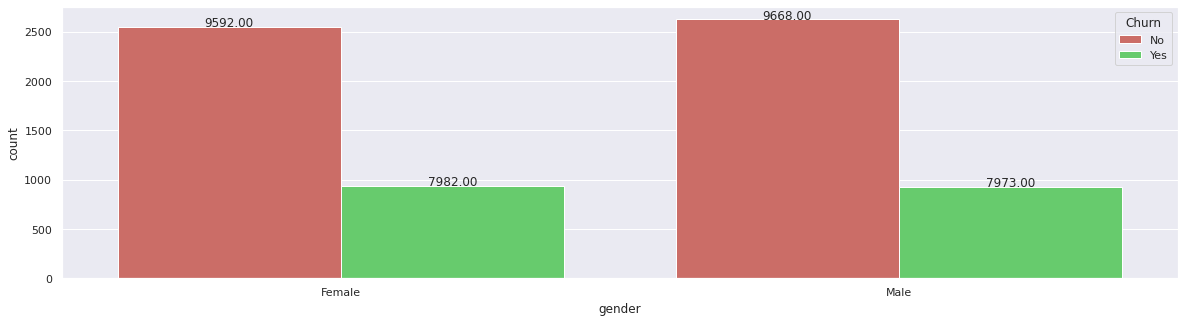

In [11]:
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.countplot(x='gender', hue='Churn', data=df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3,
          "{:1.2f}".format(height+df.shape[0]),
          ha='center')

In [12]:
# contigious table(cross table) before applying chi square test we can do this
gender_churn_ct = pd.crosstab(index=df['gender'], columns=df['Churn'])

gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [13]:
gender_churn_ct.iloc[0]

Churn
No     2549
Yes     939
Name: Female, dtype: int64

In [14]:
gender_churn_ct.iloc[1]

Churn
No     2625
Yes     930
Name: Male, dtype: int64

In [19]:
from scipy import stats
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [20]:
print('Chi2 : ', chi2)
print('P-Value : ', p)
print('Degree of Freedom : ', dof)

Chi2 :  0.4840828822091383
P-Value :  0.48657873605618596
Degree of Freedom :  1


In [21]:
pd.crosstab(index=df['gender'], columns=df['Churn'], margins=True)

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


In [22]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

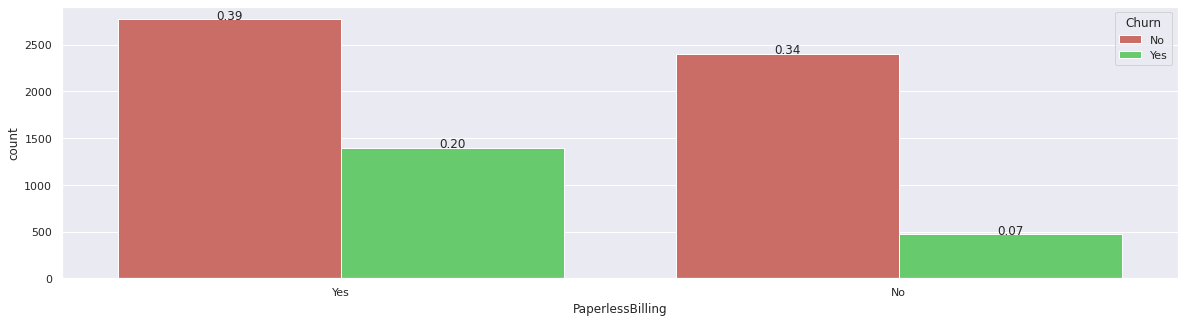

In [25]:
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3,
          "{:1.2f}".format(height/df.shape[0]),
          ha='center')

In [26]:
pb_churn_ct = pd.crosstab(index=df['PaperlessBilling'], columns=df['Churn'])

pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [27]:
(chi2, p, dof, _) = stats.chi2_contingency([pb_churn_ct.iloc[0].values, pb_churn_ct.iloc[1].values])

In [28]:
print('Chi2 : ', chi2)
print('P-Value : ', p)
print('Degree of Freedom : ', dof)

Chi2 :  258.27764906707307
P-Value :  4.073354668665985e-58
Degree of Freedom :  1
